#  TP  MCS  1 à 3  : Reconnaissance de commandes audio par DTW

**Nom du Groupe : GARCIA_TEKIN_ADALBERT_TP**

**Noms : TEKIN, GARCIA HUATO, ADALBERT**

**Prénoms : Reyyan, Juan Pablo, Michael**

**Parcours : SIAME**

Ces trois séances de TP (2 séances encadrées et une non encadrée) vont vous permettre de tester l'algorithme de programmation dynamique vu en
TD puis de réaliser la mise en oeuvre d'un système de reconnaissance audio de mots isolés (constituant des
commandes pour les drones).



Ces séances se décomposent en 3 parties : 
- Partie I : DTW et application du TD
- Partie II : Système de reconnaissance audio de mots de commande
- Partie III : Comparaison de la programmation dynamique avec une méthode de classification après prétraitement des données

Pour les **parties II et III**, vous testerez le système de reconnaissance audio sur deux corpus de voix qui serviront respectivement de base d'apprentissage (références) et de base de test (sons à reconnaître) que vous choisirez. La liste des 13 commandes au drone sont : *Atterrissage, Décollage, Avance, Tourne droite, Recule, Tourne gauche, Droite, Fais un flip, Gauche, Arrête toi, plus haut, plus bas et Etat d'urgence.*



Pour cela, vous devez par groupe de **3 étudiants** (effectif **OBLIGATOIRE**):
1. **Proposer une étude** que vous détaillerez sur un rapport
[par exemple, *influence voix masculines VS voix féminines, confronter vos propres voix à la base de données, tester l'impact de différents bruits de fond sur la reconnaissance...*];
2. Créer, en fonction de l'objectif de votre étude, vos propres base d'apprentissage et base de test à partir du corpus proposé et des voix et bruits que vous aurez enregistrés [*paramètres audio : 16 KHz, mono, 16 bits, format *.wav**];
3. Tester la DTW et une méthode de classification avec prétraitement par ACP;
4. Evaluer les résultats; 
5. Rédiger un rapport en pdf présentant l'étude, les résultats par les 2 méthodes et vos commentaires et conclusions sur votre étude (Longueur max. : 5 pages).

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import array, zeros, full, argmin, inf, ndim
import scipy
import sklearn
import math

# Partie I : Implémentation de l'algorithme de programmation dynamique 


1. Ecrivez une fonction en python DTW qui implémente le calcul et l'affichage de la matrice des coûts définie en TD. 

2. Afin d'adapter facilement le calcul des coûts suivant la nature des données (et donc des distances utilisées), écrivez une fonction pour chaque distance (euclidienne, lettres, sons) qui apparaîtra en paramètre de la fonction DTW.

In [2]:
import numpy as np
def DTW(a,b,dist,w0=1,w1=1,w2=1,contrainteGlobal=inf):
    l = b.shape[0] + 1 # taille de b + 1= ligne de g 
    c = a.shape[0] + 1 # taille de a + 1= colonne de g 
    g = zeros((l,c))

    for j in range(1,c):
        g[0,j] = inf
    for i in range(1,l):
        g[i,0] = inf
        for j in range(1,c):
            if(abs(j - i) <= contrainteGlobal):
                v0 = g[i-1,j] + w0 * dist(a[j-1],b[i-1])
                v1 = g[i-1,j-1] + w1 * dist(a[j-1],b[i-1])
                v2 = g[i,j-1] + w2 * dist(a[j-1],b[i-1])
                g[i,j] = min(v0,v1,v2)
            else:
                g[i,j] = inf
    
    score = g[l-1,c-1]/((l-1)+(c-1))
    return (score,g)

def distEuclidienne(a,b):
    return abs(a - b);

def distEuclidienneVecteur(a,b):
    return np.linalg.norm(a - b) 

def distLettres(a,b):
    if a == b :
        return 0;
    else:
        return 1;

def distSons(a,b):
    return dict([
        ("X",dict([("X",0),("C",1),("U",1),("Ux",1),("V",2)])),
        ("C",dict([("X",1),("C",0),("U",1),("Ux",1),("V",2)])),
        ("U",dict([("X",1),("C",1),("U",0),("Ux",1),("V",1)])),
        ("Ux",dict([("X",1),("C",1),("U",1),("Ux",0),("V",2)])),
        ("V",dict([("X",2),("C",2),("U",1),("Ux",2),("V",0)]))
    ])[a][b]


### Application aux exercices 

1. Testez vos programmes sur les exercices vus en TD. 

2. Modifiez les contraintes locales c'est-à-dire les pondérations suivant les directions. 

3. Ajoutez la prise en compte de contraintes globales c'est-à-dire le non calcul lorsque les cases sont trop éloignées de la diagonale (cf exercice TD séquence ADN). A partir de quelle position les contraintes globales ne changent pas les résultats ?

In [3]:
# Exemple TD exercice 2.1
print("TD : Exe[2.1]")
print('-'*56)

euclide_a = np.array([-2,10,-10,15,-13,20,-5,14,2])
euclide_b = np.array([3,-13,14,-7,9,-2])
print(DTW(euclide_a,euclide_b,distEuclidienne)[1])
print('-'*56)

#Exemple TD exercice 2.2
print("TD : Exe[2.2]")
print('-'*56)

adn_a = np.array(list("ATGGTACGTC"))
adn_b = np.array(list("AAGTAGGC"))
print(DTW(adn_a,adn_b,distLettres,contrainteGlobal=4)[1])
print('-'*56)

#Exemple TD exercice 2.3
print("TD : Exe[2.3]")
print('-'*56)

son_cinq = np.array(["X","V","V","C","X"])
son_vingt = np.array(["Ux","V","V"])
son_cent = np.array(["X","V","V"])

son_a = np.array(["X","X","V","U","X","C","X"])
print(DTW(son_a,son_cinq,distSons,1,2,1)[1])
print('='*56)
print(DTW(son_a,son_vingt,distSons,1,2,1)[1])
print('='*56)
print(DTW(son_a,son_cent,distSons,1,2,1)[1])
print('-'*56)

TD : Exe[2.1]
--------------------------------------------------------
[[  0.  inf  inf  inf  inf  inf  inf  inf  inf  inf]
 [ inf   5.  12.  25.  37.  53.  70.  78.  89.  90.]
 [ inf  16.  28.  15.  43.  37.  70.  78. 105. 104.]
 [ inf  32.  20.  39.  16.  43.  43.  62.  62.  74.]
 [ inf  37.  37.  23.  38.  22.  49.  45.  66.  71.]
 [ inf  48.  38.  42.  29.  44.  33.  47.  50.  57.]
 [ inf  48.  50.  46.  46.  40.  55.  36.  52.  54.]]
--------------------------------------------------------
TD : Exe[2.2]
--------------------------------------------------------
[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  1.  2.  3.  4. inf inf inf inf inf]
 [inf  0.  1.  2.  3.  4.  4. inf inf inf inf]
 [inf  1.  1.  1.  1.  2.  3.  4. inf inf inf]
 [inf  2.  1.  2.  2.  1.  2.  3.  4. inf inf]
 [inf  2.  2.  2.  3.  2.  1.  2.  3.  4. inf]
 [inf inf  3.  2.  2.  3.  2.  2.  2.  3.  4.]
 [inf inf inf  2.  2.  3.  3.  3.  2.  3.  4.]
 [inf inf inf inf  3.  3.  4.  3.  3.  3.  3.]]
-----

# Partie II :  Système de reconnaissance audio de mots de commande

Sur l'espace partagé, vous trouverez des enregistrements audio de mots de commandes pour un drone quadricoptère constitués de plusieurs locuteurs masculins (notés M01..M13) et locutrice féminines (F01..F05).

Vous pouvez diviser ainsi l'ensemble des données en base d'apprentissage qui serviront de références et base de test pour évaluer la reconnaissance par programmation dynamique.

In [4]:
import librosa

Les lignes de code suivantes permettent de transformer le fichier audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel de signal audio.

La matrice de sortie est composée d'autant de vecteurs colonnes que de trames d'analyses. Le nombre de lignes correspond à la dimension du vecteur représentatif : ici 12.

**Chargement d'un fichier audio :**

In [5]:
y, sr = librosa.load("./M01_arretetoi.wav")

**Calcul des MFCC**

In [6]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True, n_mfcc=12)
print("Nb Coeff MFCC x Nb Fenetres :",mfcc.shape)

Nb Coeff MFCC x Nb Fenetres : (12, 32)


**Application de la DTW**

1. Réaliser une étude que vous détaillerez sur un rapport (par exemple, *influence voix masculines VS voix féminines, confronter votre propre voix à la base de données, tester l'impact de différents bruits de fond sur la reconnaissance...*) et créer votre propre base d'apprentissage et votre base de test à partir du corpus et des voix et bruits que vous aurez enregistrés. 

2. Appliquer la DTW sur vos corpus.

**Paramètres pour enregistrements audio de vos voix perso:**

16 KHz, mono, 16 bits, format *.wav*

In [7]:
y1, sr1 = librosa.load("./corpus/dronevolant_nonbruite/F01_arretetoi.wav")
mfcc1 = librosa.feature.mfcc(y=y1,sr=sr1,hop_length=1024,htk=True,n_mfcc=12)
print("Nb Coeff MFCC x Nb Fenetres :",mfcc1.shape)

Nb Coeff MFCC x Nb Fenetres : (12, 39)


**Evaluation de la reconnaissance**

1. Calculer la matrice de confusion du système (en ligne les références et en colonne les sorties du système). 
Vous pourrez utiliser la fonction *confusion_matrix* de la librairie *sklearn*.


2. Calculer le score de reconnaissance : nombre de fichiers bien reconnus sur nombre de fichiers testés. 

*Vérifications :*
-  si vous prenez comme fichier de référence et de test M01, vous devez obtenir aucune erreur.
-  si vous prenez comme fichier de reférénce M01 et fichier de test M02, vous devez obtenir deux erreurs.

In [8]:
from os import listdir
from os.path import isfile, join
mfccs_ref = dict()
mfccs_obs = dict()
base_folder_ref = ["./corpus/dronevolant_nonbruite/"]
base_folder_obs = ["./corpus/dronevolant_jp/"]

def get_mfccs_from_file(list_directories):
    mfccs = dict()
    for base_folder in list_directories:
        for f in listdir(base_folder):
            y,sr = librosa.load(base_folder+"/"+f)
            mfcc = librosa.feature.mfcc(y=y,sr=sr,hop_length=1024,htk=True,n_mfcc=12)
            key_word = f.split("_")[1].split('.')[0]
            type_enr = f.split("_")[0]
            mfccs[f] = (key_word,type_enr,mfcc)
    return mfccs

mfccs_ref = get_mfccs_from_file(base_folder_ref)
mfccs_obs = get_mfccs_from_file(base_folder_obs)


In [11]:
def genConfusionMatrix(refs,obss,ref_filtre,obs_filtre,distantceFunction):
    y_true = []
    y_pred = []
    for obs in obss.items():
        obs_type = obs[1][1]
        if obs_type in obs_filtre:
            minimum = (inf,"")
            ref_true = obs[1][0]
            y_true.append(ref_true)
            for ref in refs.items():
                ref_pred_type = ref[1][1]
                if ref_pred_type in ref_filtre:
                    ref_pred = ref[1][0]
                    a = (np.array(obs[1][2])).transpose()
                    b = (np.array(ref[1][2])).transpose()
                    score = DTW(a,b,distantceFunction)[0]
                    if(score < minimum[0]):
                        minimum = (score,ref_pred)
            y_pred.append(minimum[1])
    return sklearn.metrics.confusion_matrix(y_true,y_pred)
    
cf_matrix = genConfusionMatrix(mfccs_ref,mfccs_obs,[ "M0" + str(i) if i < 10  else "M" + str(i) for i in range(1,14) ],["MJP"],distEuclidienneVecteur)

In [13]:
cf_matrix.trace()/cf_matrix.cumsum()[-1]

0.6923076923076923

## Partie III : Comparaison de la programmation dynamique avec une méthode de classification après prétraitement des données

Dans cette partie, nous allons comparer les résultats de la DTW avec ceux d'une méthode de classification de données : les k-plus proches voisins.

Nous utiliserons les fonctions permettant de calculer l'ACP et les k-ppv via la librairie python *scikit-learn*.




In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

### Prétraitement par ACP

Pour tester une méthode de classification, il faut d'abord réduire la dimension des MFCC

1. A partir de tous les enregistrements de la base d'apprentissage, réalisez une Analyse en composantes principales (A.C.P) en utilisant la fonction *PCA* de la librairie *scikit-learn* puis projetez les données de test dans cette nouvelle base. 

*Remarque :* vous pouvez aussi implémenter l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$ (par les fonctions *np.cov* et *np.linalg.eig*). Ces vecteurs propres constitueront le nouveau repère $P$.  Projetez ensuite les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque vecteur par la base $P = [X_1X_2X_3]$.




In [15]:
from sklearn.decomposition import PCA

In [16]:
def get_data(mfccs_dico):
    datas = []
    for ref in mfccs_dico.items():
        mfcc_ = ref[1][2]
        mean_mfcc = sum(mfcc_.transpose())/12
        l = list(mean_mfcc)
        l.insert(len(l),ref[1][0])
        datas.append(l)
    return np.array(datas) 

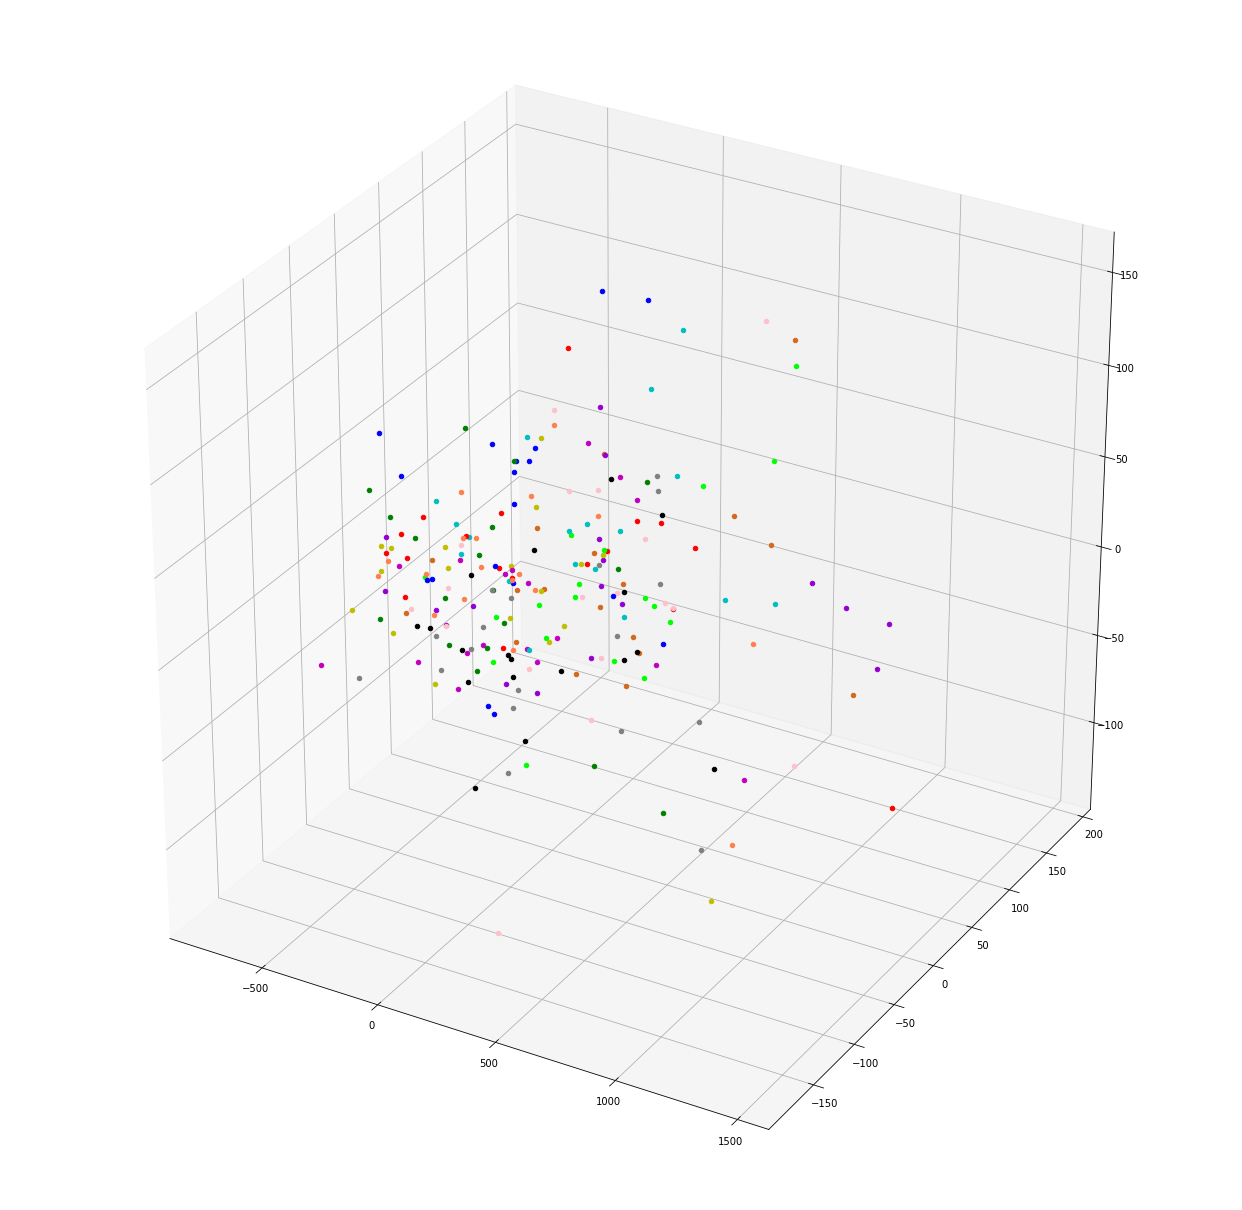

In [17]:
fig = plt.figure(figsize=(22,22))
ax = fig.add_subplot(111, projection='3d')

base = get_data(mfccs_ref)
pca = PCA(n_components=3)
pca_component = pca.fit_transform(base[:,:-1])
pca_component = np.hstack((pca_component, base[:,-1].reshape(base.shape[0],1)))
color = {'avance':'r', 'droite':'g', 'gauche':'b', 'plusbas':'y','recule':'m','faisunflip':'c','tournedroite':'k','arretetoi':'gray','tournegauche':'pink','decollage':'darkviolet','plushaut':'coral','etatdurgence':'lime','atterrissage':'chocolate'}

for pc in pca_component:
    c = color[pc[3]]
    x,y,z = pc[0],pc[1],pc[2]
    ax.scatter(float(x),float(y),float(z),c = c)

### Classification par $k$ plus proches voisins

En intelligence artificielle, la méthode des $k$ plus proches voisins (k-ppv) est une méthode d'apprentissage
supervisé. Dans ce cadre, on dispose d'une base de données d'apprentissage constituée de couples  "donnée-label". Pour estimer la sortie associée à une nouvelle entrée $x$, la méthode des $k$ plus proches voisins consiste à prendre
en compte (de façon identique) les $k$ échantillons d'apprentissage dont l'entrée est la plus proche de la nouvelle
entrée $x$, selon une distance à définir. L'algorithme 1 associé et un exemple sont donnés par la suite.

<img src="./AlgoKppv.png" width="900" height="800"  >

<img src="./kppv.png" width="300" height="300"  >

**Exemple de classification par $k$-ppv.** L'échantillon de test (cercle vert) doit être classé soit dans la première
classe des carrés bleus, soit dans la deuxième classe des triangles rouges. 
Si $k = 3$ (cercle plein), il est assigné à la deuxième classe parce qu'il y a 2 triangles et seulement 1 carré à l'intérieur du cercle intérieur. 
Si $k = 5$ (cercle en pointillés), il est assigné à la première classe (3 carrés contre 2 triangles à l'intérieur du cercle extérieur)


1. En utilisant la fonction *KNeighborsClassifier* de la librairie *sklearn.neighbors*, réalisez une classification par k-ppv sur la base d'apprentissage et la base de test que vous avez prédéfinies (prendre $k=1$).

2. Evaluez la méthode des k-ppv par le calcul de la matrice de confusion et du taux de reconnaissance.

3. Modifiez la valeur de $k$ pour les k-ppv. Améliorez-vous les scores de reconnaissance ?

4. Comparez vos résultats avec ceux de la DTW.

5. Rédigez un rapport sur votre étude, vos résultats et vos commentaires/conclusions.




In [18]:
base = get_data(mfccs_ref)

In [19]:
name_y = {'avance':'1', 'droite':'2', 'gauche':'3', 'plusbas':'4','recule':'5','faisunflip':'6','tournedroite':'7','arretetoi':'8','tournegauche':'9','decollage':'10','plushaut':'11','etatdurgence':'12','atterrissage':'13'}
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
#print(pca_component[:,:-1])
for i in range(base.shape[0]):
    base[i][-1] = name_y[base[i][-1]]

In [29]:
base = base.astype(float)
pca.fit(base[:,:-1])
knn.fit(pca.transform(base[:,:-1]),base[:,-1])

for e in (["./corpus/dronevolant_jp/"],["./corpus/dronevolant_ma"],['./corpus/dronevolant_r']):
    test = get_mfccs_from_file(e)
    test = get_data(test)
    for i in range(test.shape[0]):
        test[i][-1] = name_y[test[i][-1]]
    test = test.astype(float)
    y_test = test[:,-1];
    y_predict = knn.predict(pca.transform(test[:,:-1]))
    cf_matrix = sklearn.metrics.confusion_matrix(y_test,y_predict)
    score = cf_matrix.trace()/cf_matrix.cumsum()[-1]
    print(e,score)
    print(cf_matrix)

['./corpus/dronevolant_jp/'] 0.23076923076923078
[[0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]]
['./corpus/dronevolant_ma'] 0.23076923076923078
[[0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]]
['./corpus/dronevolant_r'] 0.07692307692307693
[[0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0